# QUESTION1

In [2]:
import pandas as pd
df = pd.read_csv('swedish_insurance.csv')
print(df.dtypes)
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)   
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

X      int64
Y    float64
dtype: object


C:\Users\Student\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Root Mean Squared Error: 35.11194257324004
R2 Score: 0.8480051329208175


# QUESTION2

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


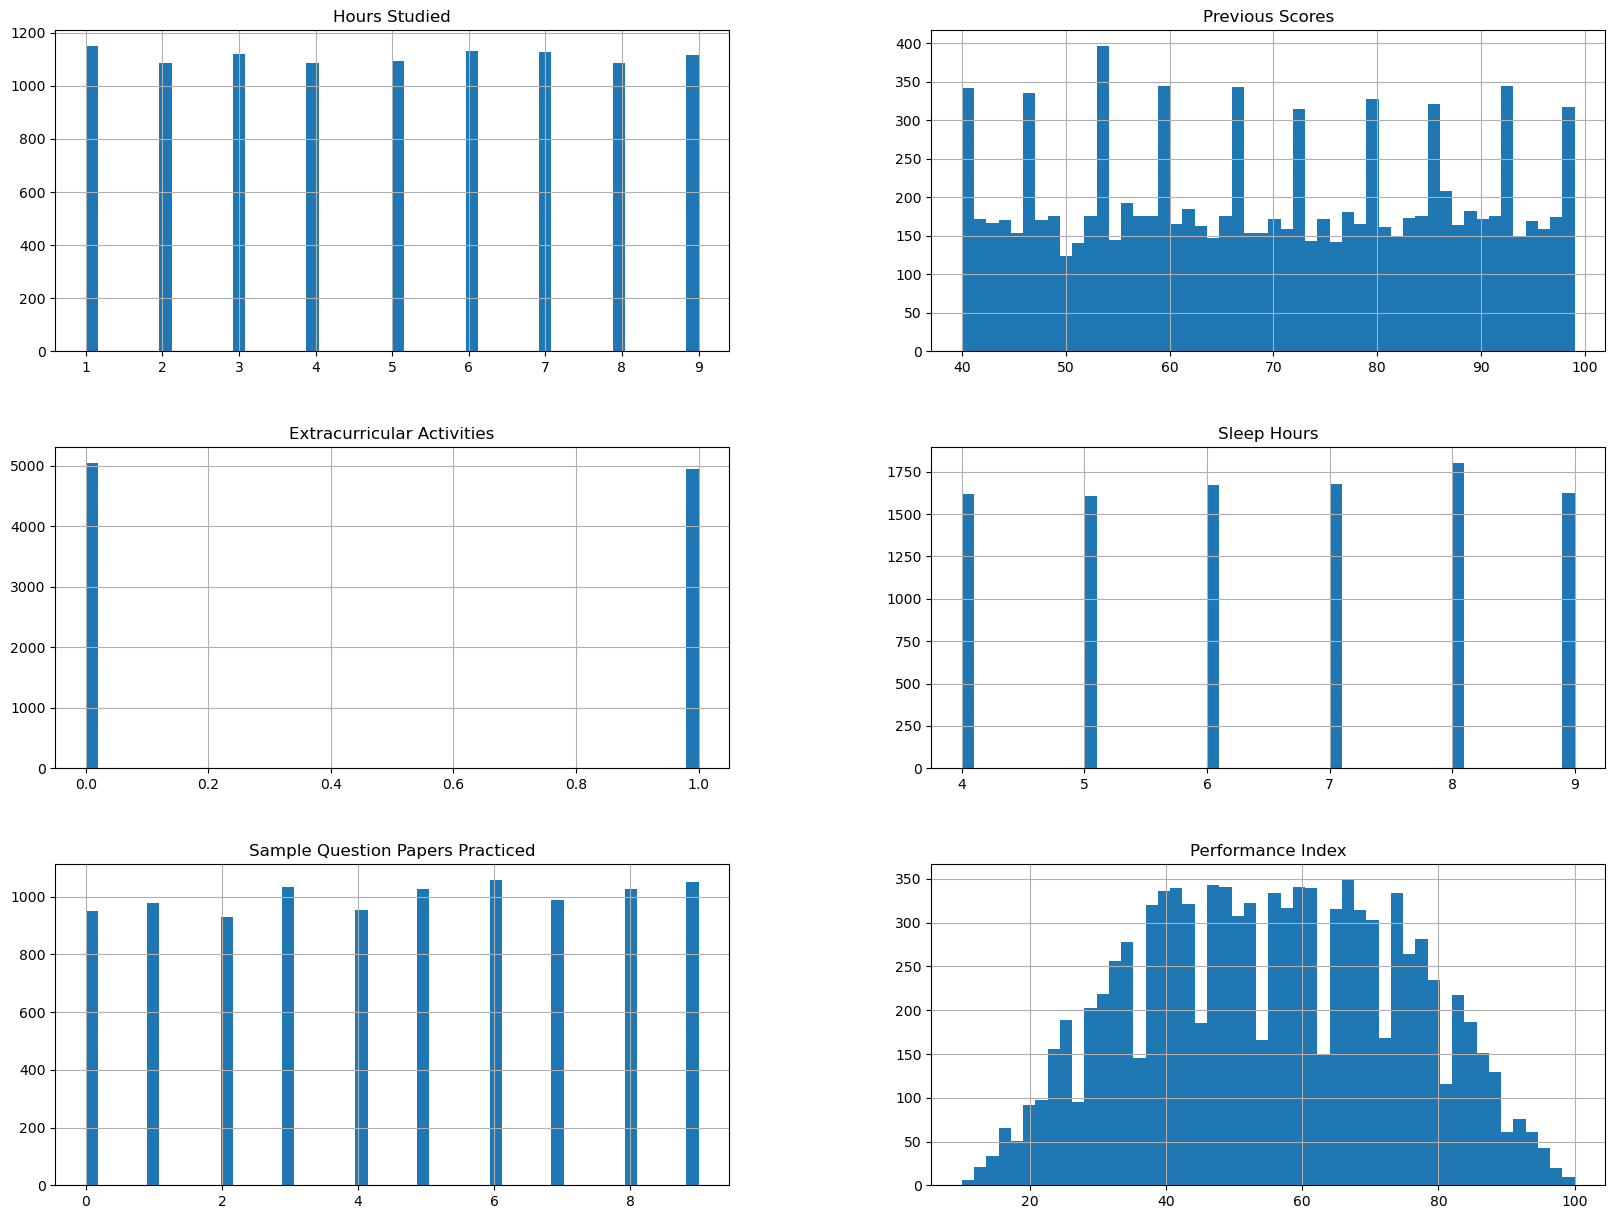

Root Mean Squared Error:  2.0165722957763466
R2 Score:  0.9890110607021136


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('Student_Performance.csv')
# Explore and clean the data
print(data.head())
# Preprocessing techniques for object columns
data['Extracurricular Activities'] = data['Extracurricular Activities'].astype('category').cat.codes
data['Sample Question Papers Practiced'] = data['Sample Question Papers Practiced'].astype('category').cat.codes
# Create plots to understand the distribution
data.hist(bins=50, figsize=(20,15))
plt.show()
# Separate the dependent and independent variables
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict the values for test set data
y_pred = model.predict(X_test)
# Evaluate the built model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error: ", mse**0.5)
print("R2 Score: ", r2)

# QUESTION3

Data Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807 

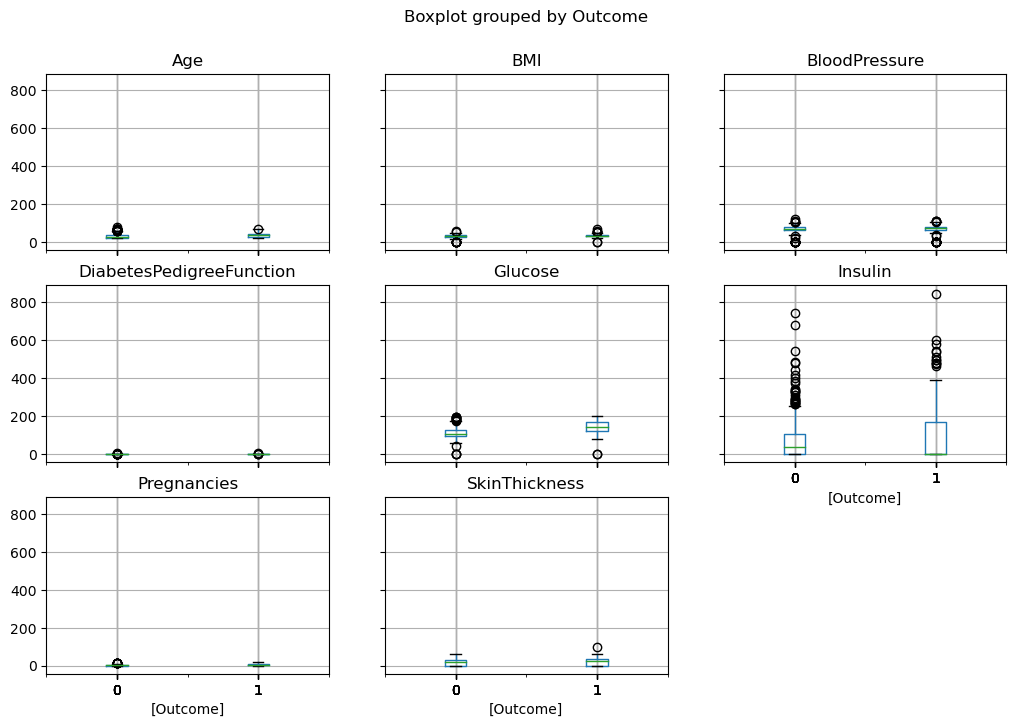

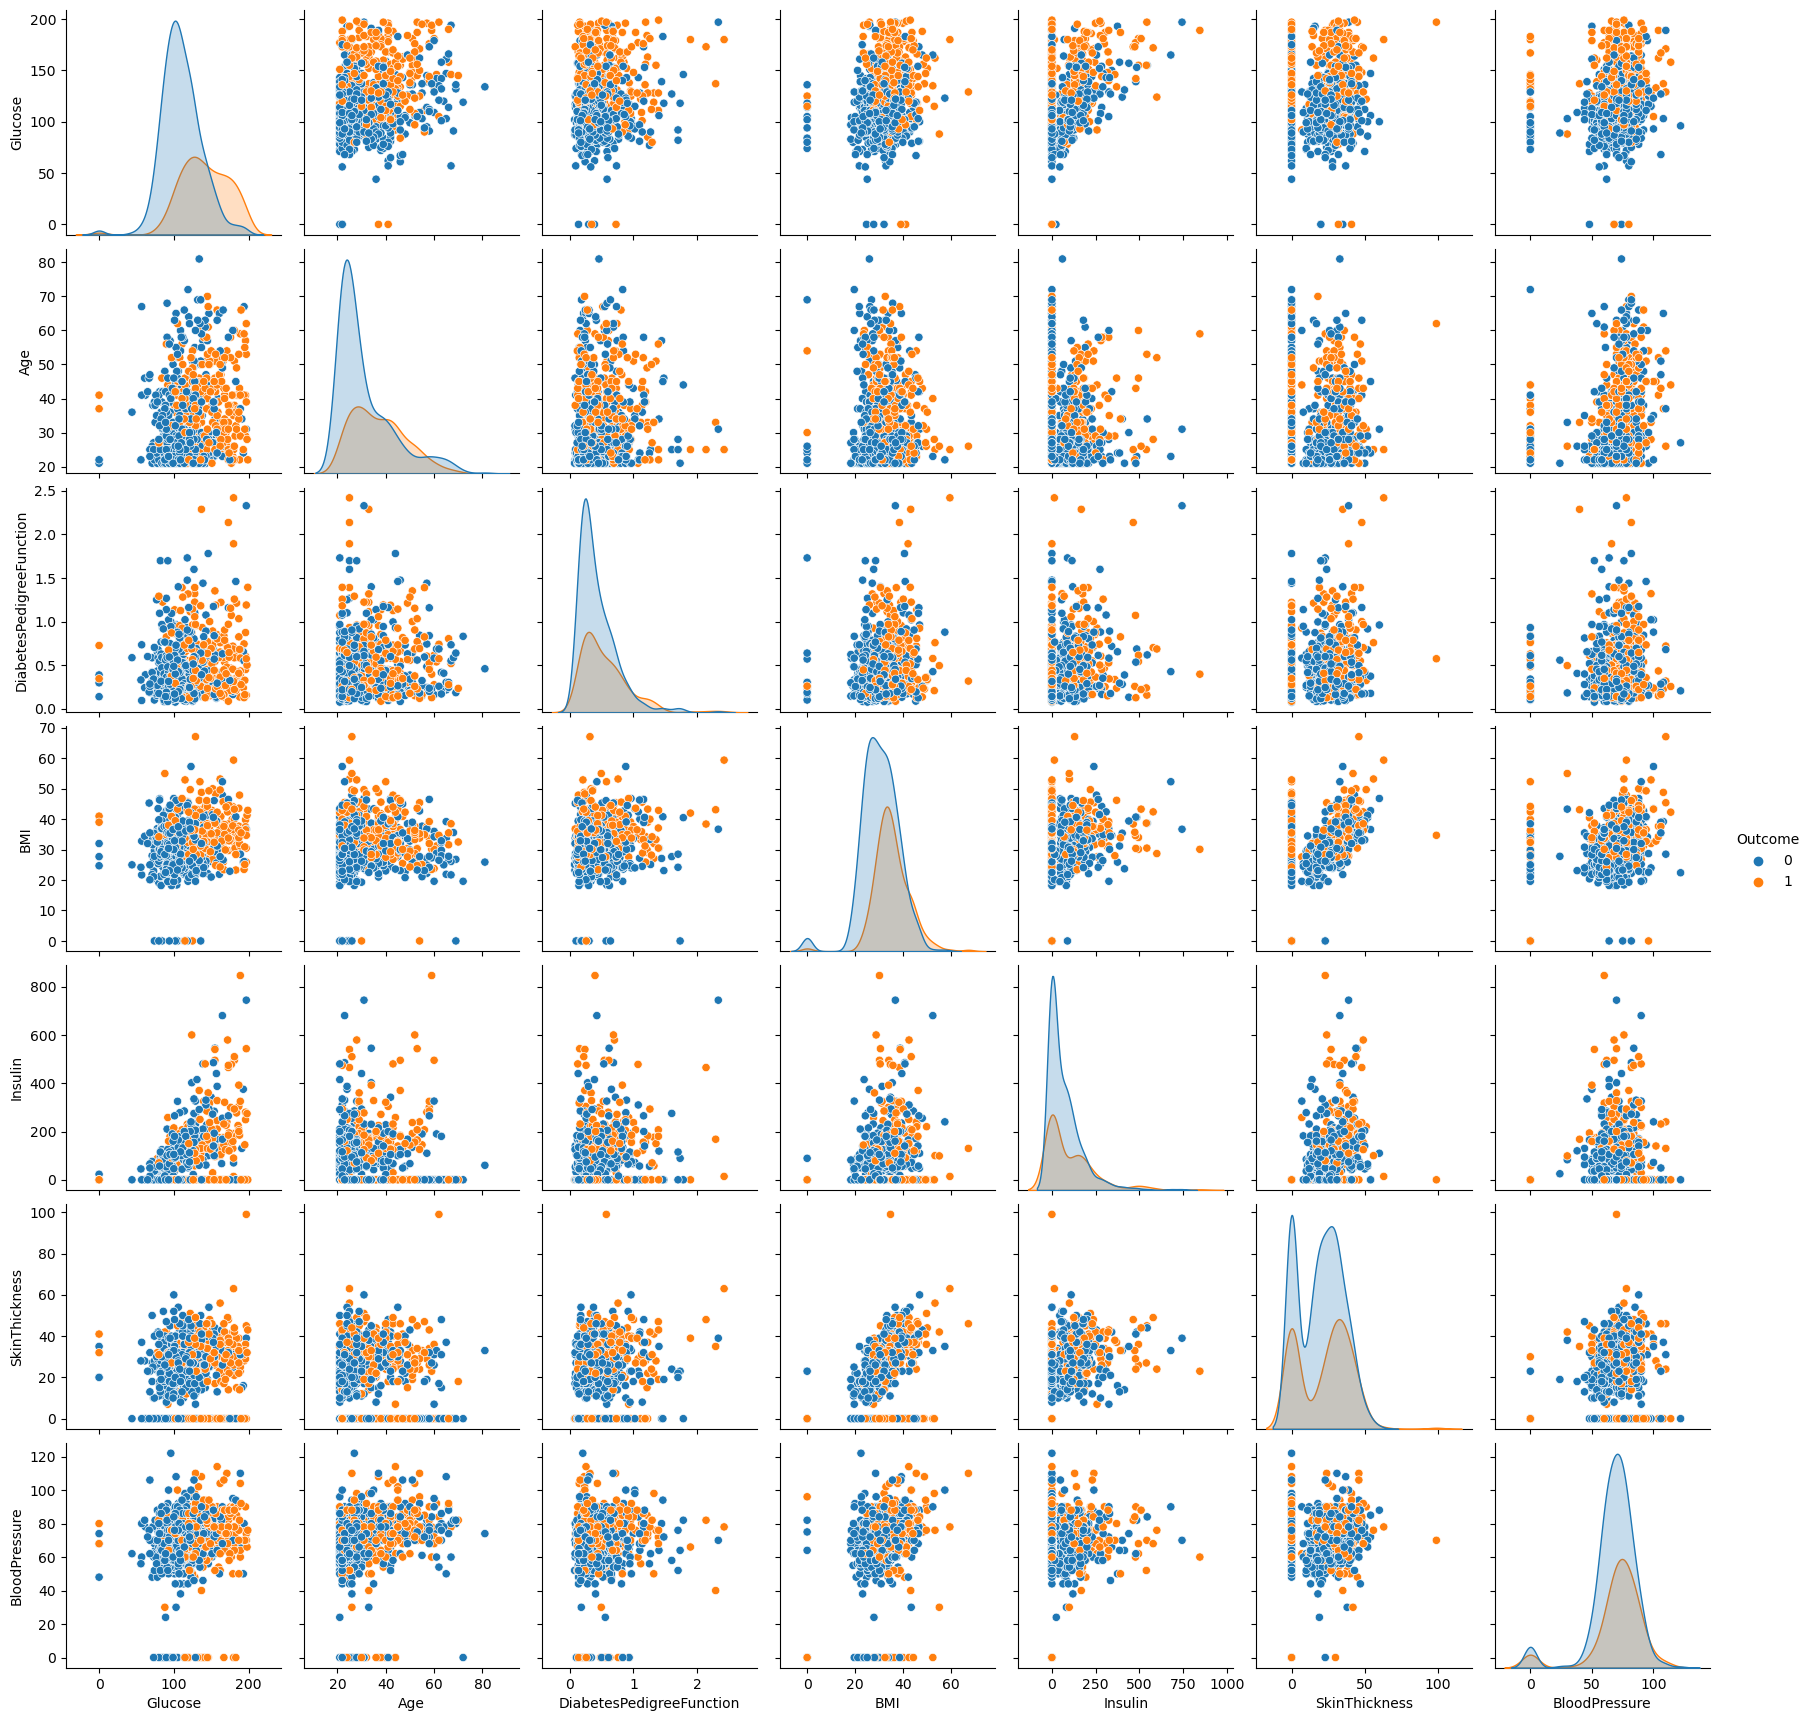

Confusion Matrix:
[[124  27]
 [ 33  47]]


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Load the dataset
data = pd.read_csv('diabetes.csv')
# Print the basic dataset information
print("Data Head:")
print(data.head())
print("\nData Statistics:")
print(data.describe())
print("\nData Info:")
print(data.info())
# Create box plots to understand how different attributes are distributed for the Outcome variable
data.boxplot(by='Outcome', figsize=(12,8))
plt.show()
# Create pair plots of selected columns
sns.pairplot(data[['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Outcome']], hue='Outcome')
plt.show()
# Split the data into training and test data and fit our training data to a logistic regression model
X = data[['Glucose', 'Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'SkinThickness', 'BloodPressure']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
# Create a confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# QUESTION4

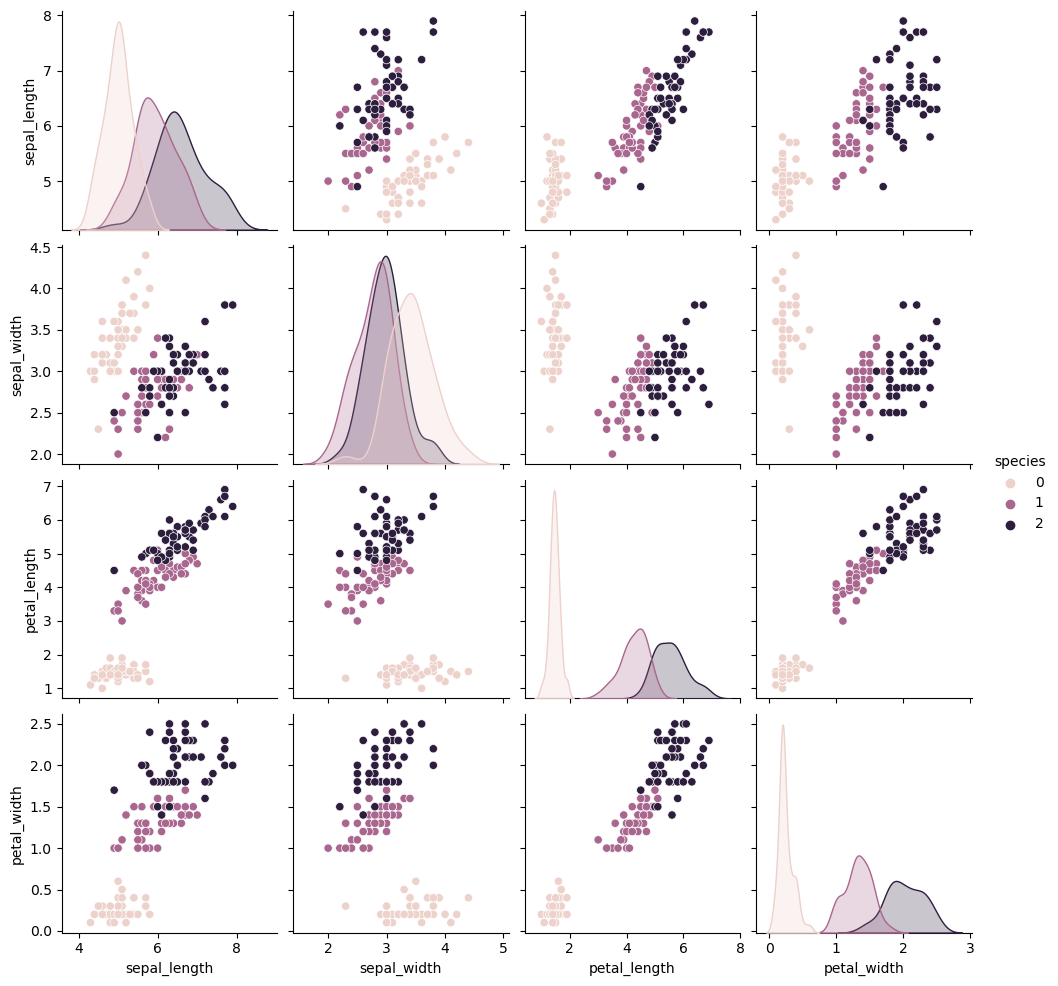

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score: 1.0


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Step 1: Load the dataset
data = """sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
... (remaining data here) ..."""
# Create a StringIO object to read CSV from string
from io import StringIO
data_io = StringIO(data)
# Read CSV into DataFrame
df = pd.read_csv("Iris Dataset.csv")
# Step 2: Preprocess the data
# Convert species column to numerical
df['species'] = df['species'].astype('category').cat.codes
# Step 3: Create pair plots
sns.pairplot(df, hue='species')
plt.show()
# Step 4: Split data into train and test sets
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 5: Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)